In [1]:
#Project by Abin Islam
#Read "Objectives.docx" to know the aims of this project.

In [2]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv("filtered_thyroid_data.csv")

In [4]:
#Double check the dataset

df.head()

,Age,Gender,Hx Radiothreapy,Adenopathy,Pathology,Focality,Risk,T,N,M,Stage,Response,Recurred
0,27,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Indeterminate,No
1,34,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
2,30,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
3,62,F,No,No,Micropapillary,Uni-Focal,Low,T1a,N0,M0,I,Excellent,No
4,62,F,No,No,Micropapillary,Multi-Focal,Low,T1a,N0,M0,I,Excellent,No


In [5]:
df.shape

(383, 13)

In [6]:
df.dtypes

Age                 int64
Gender             object
Hx Radiothreapy    object
Adenopathy         object
Pathology          object
Focality           object
Risk               object
T                  object
N                  object
M                  object
Stage              object
Response           object
Recurred           object
dtype: object

In [7]:
df.isnull().sum()

Age                0
Gender             0
Hx Radiothreapy    0
Adenopathy         0
Pathology          0
Focality           0
Risk               0
T                  0
N                  0
M                  0
Stage              0
Response           0
Recurred           0
dtype: int64

In [8]:
#No null values present.

In [9]:
#Now that we can see the column names and types, we can check the values in columns that are not used for the objectives.
#This is done to see if there are any interesting factors that can be analysed regardless of objectives.

In [10]:
df['Hx Radiothreapy'].value_counts()

Hx Radiothreapy
No     376
Yes      7
Name: count, dtype: int64

In [11]:
df['Adenopathy'].value_counts()

Adenopathy
No           277
Right         48
Bilateral     32
Left          17
Extensive      7
Posterior      2
Name: count, dtype: int64

In [12]:
df['Focality'].value_counts()

Focality
Uni-Focal      247
Multi-Focal    136
Name: count, dtype: int64

In [13]:
df['Risk'].value_counts()

Risk
Low             249
Intermediate    102
High             32
Name: count, dtype: int64

In [14]:
df['T'].value_counts()

T
T2     151
T3a     96
T1a     49
T1b     43
T4a     20
T3b     16
T4b      8
Name: count, dtype: int64

In [15]:
df['N'].value_counts()

N
N0     268
N1b     93
N1a     22
Name: count, dtype: int64

In [16]:
df['M'].value_counts()

M
M0    365
M1     18
Name: count, dtype: int64

In [17]:
#After having checked the values of these columns, "Focality" and "Risk" will be kept
#NOTE: TNM is a system used to determine the stage of the cancer, since we already have a column for this, 
#these three columns will be removed.

In [18]:
df_cleaned = df.drop(columns=['Hx Radiothreapy', 'Adenopathy', 'T', 'N', 'M'])

In [19]:
#Check cleaned dataset.

In [20]:
df_cleaned.head()

,Age,Gender,Pathology,Focality,Risk,Stage,Response,Recurred
0,27,F,Micropapillary,Uni-Focal,Low,I,Indeterminate,No
1,34,F,Micropapillary,Uni-Focal,Low,I,Excellent,No
2,30,F,Micropapillary,Uni-Focal,Low,I,Excellent,No
3,62,F,Micropapillary,Uni-Focal,Low,I,Excellent,No
4,62,F,Micropapillary,Multi-Focal,Low,I,Excellent,No


In [21]:
sns.set_style("darkgrid")

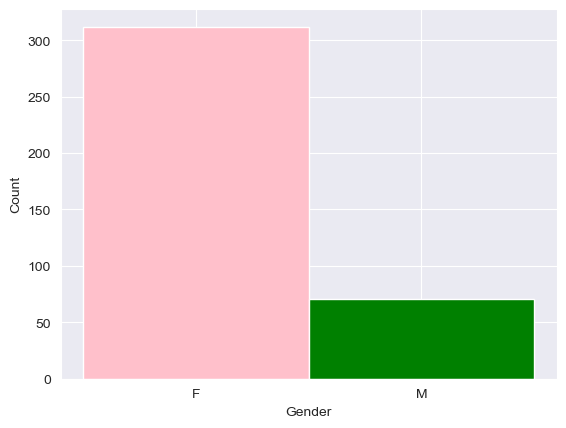

In [22]:
ax = sns.histplot(df_cleaned, x = 'Gender')
ax.patches[0].set_facecolor("pink")
ax.patches[1].set_facecolor("green")
plt.show()

In [23]:
#We can immediately see that females are more susceptible to thyroid cancer. It can be argued that the sample size simply
#has more females. However, research provides evidence that women, on average, are diagnosed with thyroid cancer more often.
#Link: https://www.cancer.gov/news-events/cancer-currents-blog/2021/thyroid-cancer-diagnosed-more-in-women

<Axes: xlabel='Age', ylabel='Count'>

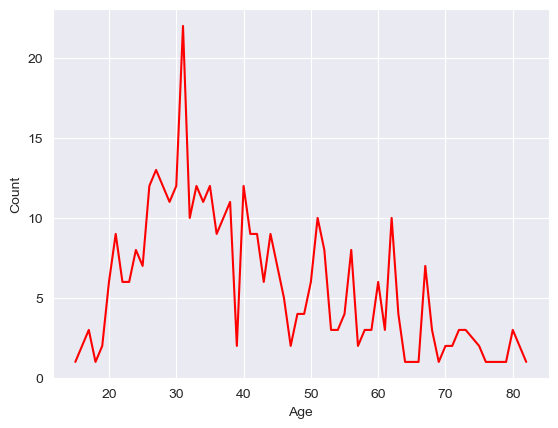

In [24]:
sns.lineplot(
    data = df_cleaned.groupby(['Age']).size().reset_index(name = 'Count'),
    x = 'Age', y = 'Count', color = 'red')

<Axes: xlabel='Age', ylabel='Count'>

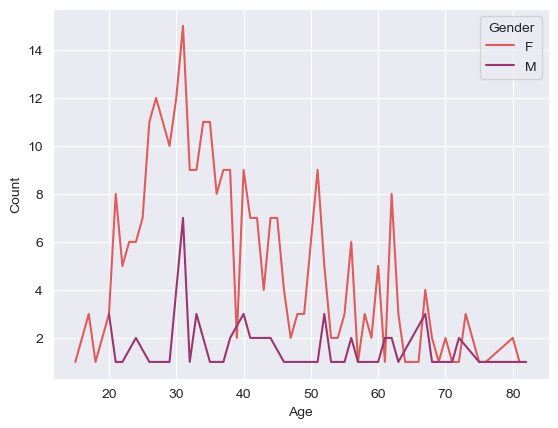

In [25]:
sns.lineplot(
    data = df_cleaned.groupby(['Age', 'Gender']).size().reset_index(name = 'Count'),
    x = 'Age', y = 'Count', hue = 'Gender', palette = 'flare')

In [26]:
#In the first graph, it can be seen that thryoid cancer affects those that are in their early 30s the most often. However,
#this may be due to the overall population itself as there may be more people in that age range regardless.

In [27]:
#The pattern in the first graph is similar to the susceptibility in females (as seen on the second graph). It is different
#for males. Despite the similar spike in thyroid cancer in males of early 30s, the average number of males with thyroid 
#cancer is similar throughout the other ages.

In [28]:
#Predictive modelling

In [29]:
import numpy as np
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

In [30]:
df_cleaned.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 383 entries, 0 to 382
Data columns (total 8 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   Age        383 non-null    int64 
 1   Gender     383 non-null    object
 2   Pathology  383 non-null    object
 3   Focality   383 non-null    object
 4   Risk       383 non-null    object
 5   Stage      383 non-null    object
 6   Response   383 non-null    object
 7   Recurred   383 non-null    object
dtypes: int64(1), object(7)
memory usage: 24.1+ KB


In [31]:
df_cleaned['Pathology'].value_counts()

Pathology
Papillary         287
Micropapillary     48
Follicular         28
Hurthel cell       20
Name: count, dtype: int64

In [32]:
df_cleaned['Stage'].value_counts()

Stage
I      333
II      32
IVB     11
III      4
IVA      3
Name: count, dtype: int64

In [33]:
df_cleaned['Recurred'].value_counts()

Recurred
No     275
Yes    108
Name: count, dtype: int64

In [34]:
df_predict = df_cleaned[['Pathology', 'Stage', 'Recurred']]

In [35]:
df_predict.head()

,Pathology,Stage,Recurred
0,Micropapillary,I,No
1,Micropapillary,I,No
2,Micropapillary,I,No
3,Micropapillary,I,No
4,Micropapillary,I,No


In [36]:
df_predict.Recurred = [1 if value == 'Yes' else 0 for value in df_predict.Recurred]

C:\Users\dhaen\AppData\Local\Temp\ipykernel_13060\624396745.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict.Recurred = [1 if value == 'Yes' else 0 for value in df_predict.Recurred]


In [37]:
df_predict['Pathology'].replace(['Papillary', 'Micropapillary', 'Follicular', 'Hurthel cell'], [1,2,3,4], inplace=True)

C:\Users\dhaen\AppData\Local\Temp\ipykernel_13060\3375185945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['Pathology'].replace(['Papillary', 'Micropapillary', 'Follicular', 'Hurthel cell'], [1,2,3,4], inplace=True)


In [38]:
df_predict.tail()

,Pathology,Stage,Recurred
378,1,IVB,1
379,1,IVB,1
380,1,IVB,1
381,4,IVA,1
382,1,IVA,1


In [39]:
#Pathology key:
#Papillary = 0
#Micropapillary = 1
#Follicular = 2
#Hurthel cell = 3

In [40]:
df_predict['Stage'].replace(['I', 'II', 'III', 'IVA', 'IVB'], [1,2,3,4,5], inplace=True)

C:\Users\dhaen\AppData\Local\Temp\ipykernel_13060\1329906200.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_predict['Stage'].replace(['I', 'II', 'III', 'IVA', 'IVB'], [1,2,3,4,5], inplace=True)


In [41]:
df_predict.tail()

,Pathology,Stage,Recurred
378,1,5,1
379,1,5,1
380,1,5,1
381,4,4,1
382,1,4,1


In [42]:
#Predictors and target

y = df_predict['Recurred'] #Target
X = df_predict.drop(['Recurred'], axis = 1)

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
#Normalise the data

scaler = StandardScaler()

X_scaled = scaler.fit_transform(X)

In [45]:
#Training and testing

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size = 0.3, random_state = 42)

In [46]:
#Logistic regression model

lr = LogisticRegression()

lr.fit(X_train, y_train)

y_pred = lr.predict(X_test)

In [48]:
y_pred #1 means that the prediction is that thyroid cancer recurred, vice versa for 0

array([0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0], dtype=int64)

In [49]:
y_test #If y_pred = y_test, the prediction was perfect

268    0
250    0
318    1
331    1
56     0
      ..
109    0
17     0
173    0
24     0
203    0
Name: Recurred, Length: 115, dtype: int64

In [52]:
#Evaluate the model

from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy: .2f}")

Accuracy:  0.83


In [53]:
#Accuracy was 83%, which is not too bad. The prediction model is pretty good.

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.99      0.89        83
           1       0.93      0.41      0.57        32

    accuracy                           0.83       115
   macro avg       0.87      0.70      0.73       115
weighted avg       0.84      0.83      0.80       115



In [55]:
#Precision for recurring thyroid cancer was 93%, 81% for vice versa.

In [56]:
#Relationship between response and recurrence

In [57]:
from scipy.stats import chi2_contingency

In [58]:
#Null hypothesis: Response and recurrence are not correlated
#Alternate hypothesis: Response and recurrence are correlated

In [59]:
cross_tab = pd.crosstab(index = df_cleaned['Response'], columns = df_cleaned['Recurred'])
cross_tab

Recurred,No,Yes
Response,,
Biochemical Incomplete,12,11
Excellent,207,1
Indeterminate,54,7
Structural Incomplete,2,89


In [60]:
chi_sq_result = chi2_contingency(cross_tab,)

In [64]:
p, ra = chi_sq_result[1], "reject" if chi_sq_result[1] < 0.05 else "accept"

In [65]:
print(f"The p-value is {chi_sq_result[1]} so we {ra} the null hypothesis with {chi_sq_result[2]} degrees of freedom")

The p-value is 8.863123780463506e-67 so we reject the null hypothesis with 3 degrees of freedom


In [ ]:
#This means that the response is correlated with recurrence.